### 주제

---

🧪 **금융 고객데이터에 대한 클러스터링 시행 및 군집별 인사이트 도출**

- 데이터셋에 대한 현황을 파악할 수 있도록 합니다.
- 다양한 condition(군집갯수, 컬럼갯수)을 통해 결과를 비교하도록 합니다.
- 군집(클러스터)별로 유의미한 특징을 살펴보고 이를 시각화 하겠습니다.
- 이를 바탕으로 군집별 인사이트를 제시할 수 있도록 합니다.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.

In [ ]:
card = pd.read_csv('./data//cards_data.csv')
trans = pd.read_csv('./data/transactions_data.csv')
user = pd.read_csv('./data/users_data.csv')

In [143]:
card = card[['id','client_id','card_type','num_cards_issued','credit_limit']]
trans = trans[['id', 'client_id', 'card_id', 'amount', 'errors']]
user = user[['id', 'current_age', 'retirement_age', 'gender',
                    'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards']]

## 데이터탐색

In [10]:
print(card.shape)
card.head()

(6146, 13)


,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [11]:
print(trans.shape)
trans.head()

(13305915, 12)


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [12]:
print(user.shape)
user.head()

(2000, 14)


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [44]:
card.isna().sum()
for c in card.columns[:]:
    if c in ['card_on_dark_web']:
        print(f'{c}: {card[c].unique()}')

card_on_dark_web: ['No']


In [35]:
trans[trans['errors'].notna()]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
166,7475516,2010-01-01 04:56:00,464,3233,$104.10,Swipe Transaction,32175,Orlando,FL,32804.0,7538,Technical Glitch
248,7475611,2010-01-01 06:10:00,1797,1127,$28.84,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Expiration
275,7475643,2010-01-01 06:19:00,1797,1127,$38.58,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Card Number
401,7475792,2010-01-01 07:02:00,1424,4710,$-72.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,Insufficient Balance
483,7475881,2010-01-01 07:22:00,843,184,$37.54,Swipe Transaction,89462,Terre Haute,IN,47805.0,5300,Insufficient Balance
...,...,...,...,...,...,...,...,...,...,...,...,...
13305422,23761252,2019-10-31 19:13:00,1902,3056,$99.28,Chip Transaction,61677,Caldwell,OH,43724.0,5411,Technical Glitch
13305606,23761496,2019-10-31 20:48:00,1985,4085,$10.74,Chip Transaction,70635,Alpharetta,GA,30022.0,5310,Bad PIN
13305757,23761675,2019-10-31 21:57:00,87,3607,$20.00,Chip Transaction,27092,Leander,TX,78641.0,4829,Insufficient Balance
13305803,23761735,2019-10-31 22:23:00,1851,3164,$166.38,Online Transaction,32480,ONLINE,NaN,NaN,4899,Insufficient Balance


In [36]:
trans['errors'].unique()

array([nan, 'Technical Glitch', 'Bad Expiration', 'Bad Card Number',
       'Insufficient Balance', 'Bad PIN', 'Bad CVV', 'Bad Zipcode',
       'Insufficient Balance,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad PIN,Technical Glitch',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration',
       'Bad Card Number,Insufficient Balance',
       'Bad Expiration,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Technical Glitch', 'Bad Expiration,Bad CVV',
       'Bad CVV,Insufficient Balance', 'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance',
       'Bad Card Number,Bad Expiration,Insufficient Balance',
       'Bad Zipcode,Technical Glitch'], dtype=object)

In [47]:
trans[(trans['errors'].notna()) & (trans['errors'].str.contains('Bad'))]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
248,7475611,2010-01-01 06:10:00,1797,1127,$28.84,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Expiration
275,7475643,2010-01-01 06:19:00,1797,1127,$38.58,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Card Number
1000,7476516,2010-01-01 09:58:00,373,2817,$1.31,Swipe Transaction,69831,Grabill,IN,46741.0,5812,Bad PIN
1313,7476898,2010-01-01 11:17:00,1129,5492,$23.42,Swipe Transaction,61738,Fresno,CA,93722.0,5094,Bad PIN
2007,7477730,2010-01-01 14:07:00,110,4103,$86.32,Swipe Transaction,64182,Austin,TX,78728.0,5310,Bad PIN
...,...,...,...,...,...,...,...,...,...,...,...,...
13304705,23760356,2019-10-31 15:21:00,1910,4615,$31.50,Online Transaction,50404,ONLINE,NaN,NaN,4784,Bad CVV
13304816,23760500,2019-10-31 15:49:00,1712,3291,$34.56,Online Transaction,16798,ONLINE,NaN,NaN,4121,Bad Card Number
13305179,23760945,2019-10-31 17:16:00,1899,5969,$45.29,Chip Transaction,99224,Snohomish,WA,98290.0,5812,Bad PIN
13305261,23761050,2019-10-31 18:00:00,757,3048,$158.57,Chip Transaction,54850,Brooklyn,NY,11235.0,4814,Bad PIN


In [41]:
user[user['credit_score']<669]

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
11,640,29,63,1990,9,Female,8677 Littlewood Lane,40.42,-104.74,$22427,$45727,$94016,629,1
14,1590,48,62,1971,5,Female,781 East Street,29.45,-98.50,$10059,$20513,$32509,599,1
17,153,76,71,1943,8,Female,172 Birch Street,35.29,-111.32,$21950,$27484,$16803,660,4
19,511,66,68,1953,10,Male,153 Tenth Lane,32.21,-110.88,$17460,$35602,$55369,661,5
25,877,36,63,1983,8,Female,801 Mill Boulevard,33.44,-111.85,$16829,$34317,$61826,610,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1854,48,69,1972,1,Male,4405 Wessex Drive,35.06,-85.25,$23706,$48337,$70603,625,2
1978,1041,48,62,1971,9,Female,6144 Summit Street,34.87,-85.50,$15950,$32522,$50155,639,1
1982,1735,56,66,1963,5,Male,9291 Jefferson Drive,27.64,-80.39,$17942,$36583,$56310,614,6
1991,378,18,60,2001,5,Female,512 Second Avenue,46.21,-119.16,$18753,$38241,$81833,596,1


## 데이터 전처리
2. 사용할 컬럼: merge()할 때 사용할 컬럼
    - ✅ cards_data
        1. id: 카드 ID
        2. client_id: 고객 ID
        3. card_type: 카드 유형
        4. num_cards_issued: 발급된 카드 총 개수
        5. credit_limit: 카드 한도
    - ✅ transactions_data
        1. id: 거래 고유 ID
        2. client_id: 고객 ID
        3. card_id: 사용된 카드 ID
        4. amount: 거래 금액
        5. error: 거래 중 발생한 오류
    - ✅ users_data
        1. id: 고객 ID
        2. current_age: 나이
        3. retirement_age: 예상 은퇴 나이
        4. gender: 성별
        5. yearly_income: 연간 소득
        6. total_debt: 총 부채
        7. credit_score: 신용점수
        8. num_credit_cards: 보유 신용카드 수

## Card

In [16]:
card.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


### 결측치

In [18]:
card.isna().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

In [19]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [20]:
category_card = card.select_dtypes(['object'])
for c in category_card.columns:
    if c not in ['acct_open_date', 'expires']:
        print(f'{c}: {card[c].unique()}')

card_brand: ['Visa' 'Mastercard' 'Discover' 'Amex']
card_type: ['Debit' 'Credit' 'Debit (Prepaid)']
has_chip: ['YES' 'NO']
credit_limit: ['$24295' '$21968' '$46414' ... '$17116' '$2468' '$28074']
card_on_dark_web: ['No']


### 문자형 -> 수치형

In [21]:
# 문자열 제거
card['credit_limit'] = pd.to_numeric(card['credit_limit'].str.replace('$',''), errors='coerce')
card.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   int64 
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(7), object(6)
memory usage: 624.3+ KB


In [23]:
card.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,28,09/2008,2009,No


### 이상치
1. 카드 번호가 16/15자리인지 -> X
2. cvv 번호가 3/4자리인지    -> O -> drop
3. expires가 acct_open_date보다 빠른 경우 -> X
4. year_pin_last_changed가 acct_open_date보다 빠른 경우 -> X

In [28]:
card.shape

(6146, 14)

In [25]:
card['acct_open_date'] = pd.to_datetime(card['acct_open_date'])
card['expires'] = pd.to_datetime(card['expires'])
card['acct_open_year'] = card['acct_open_date'].dt.year
card.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year
0,4524,825,Visa,Debit,4344676511950444,2022-12-01,623,YES,2,24295,2002-09-01,2008,No,2002
1,2731,825,Visa,Debit,4956965974959986,2020-12-01,393,YES,2,21968,2014-04-01,2014,No,2014
2,3701,825,Visa,Debit,4582313478255491,2024-02-01,719,YES,2,46414,2003-07-01,2004,No,2003
3,42,825,Visa,Credit,4879494103069057,2024-08-01,693,NO,1,12400,2003-01-01,2012,No,2003
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,75,YES,1,28,2008-09-01,2009,No,2008


In [ ]:
print(len(card[card['card_number'].astype(str).str.len().isin([15,16])]))
print(len(card[card['cvv'].astype(str).str.len().isin([3,4])]))

card = card.drop(index=list(card[~card['cvv'].astype(str).str.len().isin([3,4])].index)).reset_index(drop=True)

6146
5529


In [43]:
print(card.shape)
print(len(card[card['expires']<card['acct_open_date']]))
print(len(card[card['year_pin_last_changed']<card['acct_open_year']]))

(5529, 14)
0
0


----

In [46]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     5529 non-null   int64         
 1   client_id              5529 non-null   int64         
 2   card_brand             5529 non-null   object        
 3   card_type              5529 non-null   object        
 4   card_number            5529 non-null   int64         
 5   expires                5529 non-null   datetime64[ns]
 6   cvv                    5529 non-null   int64         
 7   has_chip               5529 non-null   object        
 8   num_cards_issued       5529 non-null   int64         
 9   credit_limit           5529 non-null   int64         
 10  acct_open_date         5529 non-null   datetime64[ns]
 11  year_pin_last_changed  5529 non-null   int64         
 12  card_on_dark_web       5529 non-null   object        
 13  acc

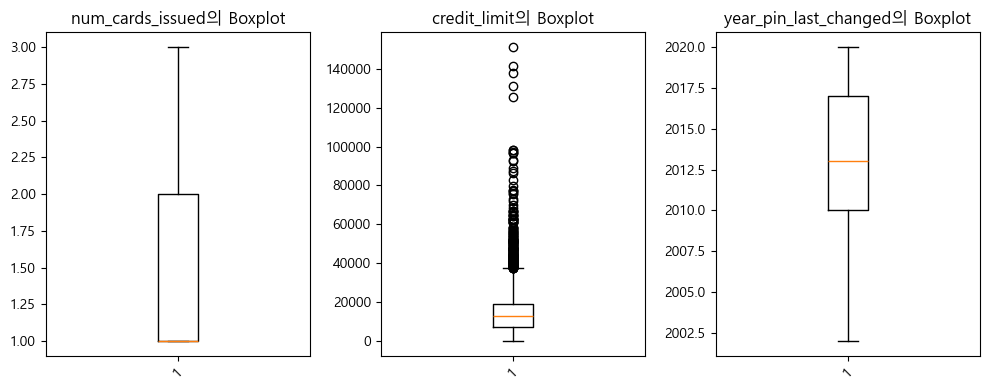

In [49]:
numeric_card_col = ['num_cards_issued','credit_limit', 'year_pin_last_changed']

fig, ax = plt.subplots(1,3,figsize=(10,4))
ax = ax.flatten()

for i,c in enumerate(numeric_card_col):
    ax[i].boxplot(card[c])
    ax[i].set_title(f'{c}의 Boxplot')
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [50]:
card.shape

(5529, 14)

In [51]:
card.to_csv('./data/new_card_data.csv', index=False)

## User

In [52]:
print(user.shape)
user.head()

(2000, 14)


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


### 결측치

In [54]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [56]:
category_user = user.select_dtypes(['object'])
for c in category_user.columns:
    print(f'{c}: {user[c].unique()}')

gender: ['Female' 'Male']
address: ['462 Rose Lane' '3606 Federal Boulevard' '766 Third Drive' ...
 '276 Fifth Boulevard' '259 Valley Boulevard' '472 Ocean View Street']
per_capita_income: ['$29278' '$37891' '$22681' ... '$24218' '$15175' '$32325']
yearly_income: ['$59696' '$77254' '$33483' ... '$30942' '$54654' '$65909']
total_debt: ['$127613' '$191349' '$196' ... '$71066' '$27241' '$181261']


### 문자형 -> 수치형

In [57]:
# 타입 변경
user['per_capita_income'] = pd.to_numeric(user['per_capita_income'].str.replace('$',''), errors='coerce')
user['yearly_income'] = pd.to_numeric(user['yearly_income'].str.replace('$',''), errors='coerce')
user['total_debt'] = pd.to_numeric(user['total_debt'].str.replace('$',''), errors='coerce')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   int64  
 10  yearly_income      2000 non-null   int64  
 11  total_debt         2000 non-null   int64  
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 218.9+ KB


### 이상치
1. per_capita_income
2. yearly_income  
둘다 로그 변환 후 iqr 방식으로 이상치 처리


In [59]:
user.shape

(2000, 14)

In [64]:
print(user['birth_month'].unique(), user['birth_year'].unique())

[11 12  1  9 10  7  6  5  4  8  2  3] [1966 1938 1957 1976 1977 1983 1993 1986 1992 1990 2002 1985 1971 1978
 1943 1997 1953 1991 1949 1975 1979 1982 2001 1970 1998 1972 1968 1973
 1961 1929 1941 1962 1994 1959 1958 1964 1960 1937 1956 1989 1996 1955
 1932 1965 1987 1967 1944 1963 1984 1995 1974 2000 1999 1980 1933 1952
 1936 1951 1927 1945 1935 1981 1939 1988 1950 1969 1942 1931 1918 1954
 1946 1934 1947 1940 1928 1948 1930 1921 1926 1920]


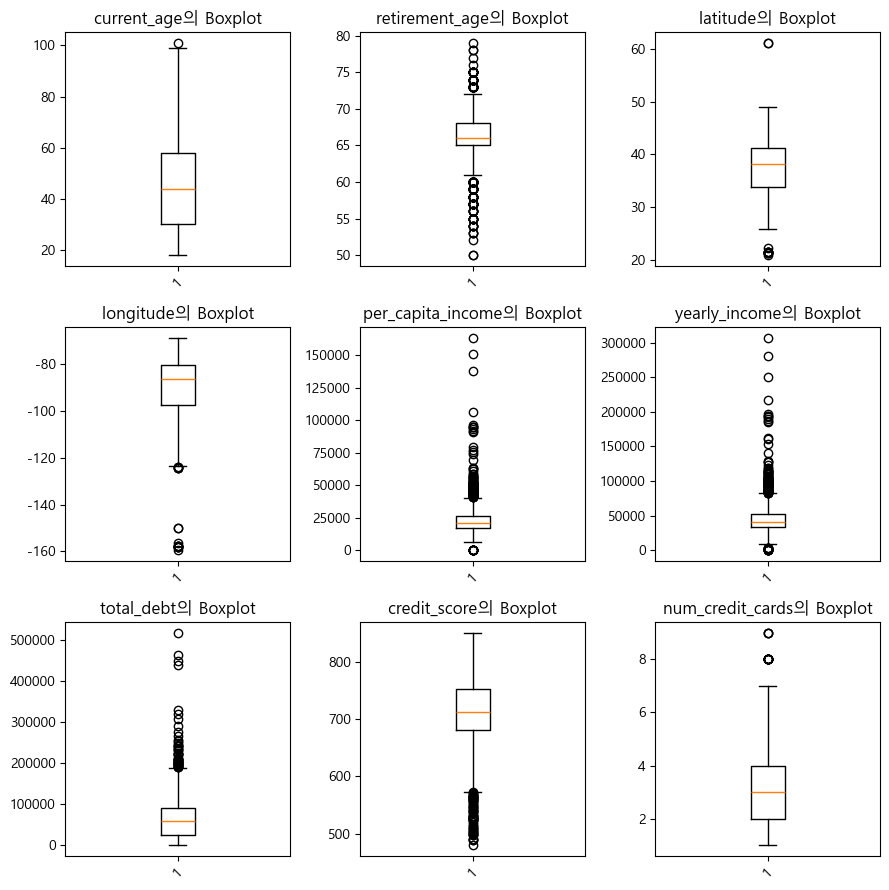

In [69]:
numeric_user_col = ['current_age', 'retirement_age', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards']


fig, ax = plt.subplots(3,3,figsize=(9,9))
ax = ax.flatten()

for i,c in enumerate(numeric_user_col):
    ax[i].boxplot(user[c])
    ax[i].set_title(f'{c}의 Boxplot')
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [70]:
print(min(user['per_capita_income']))
print(min(user['yearly_income']))

0
1


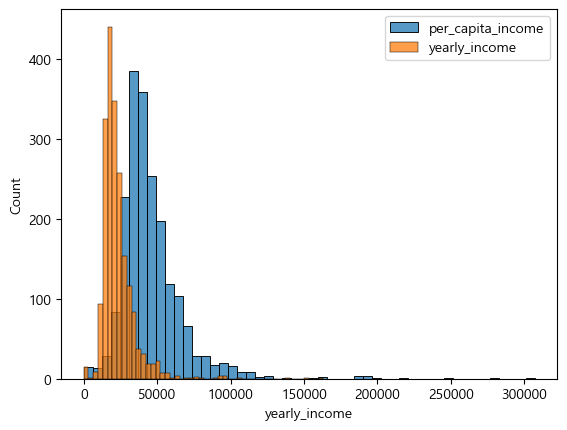

In [ ]:
sns.histplot(user['yearly_income'], bins=50)
sns.histplot(user['per_capita_income'], bins=50)
plt.legend(['per_capita_income','yearly_income'])
plt.show()

In [ ]:
# 연간 소득 이상
user['log_yearly_income'] = np.log(user['yearly_income'] + 1)  # 0 대비 +1 처리

print(user['yearly_income'].sort_values()[:5])
# user[user['yearly_income']==0]

q1 = user['log_yearly_income'].quantile(0.25)
q3 = user['log_yearly_income'].quantile(0.75)
iqr = (q3 - q1)

print(q1- 1.5*iqr, q3 + 1.5*iqr)

764       1
1686      2
1342      3
1543      4
1731    399
Name: yearly_income, dtype: int64
9.688403730836258 11.582735460784464


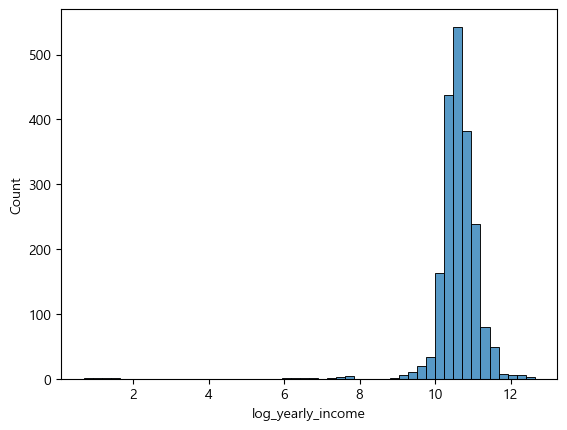

In [ ]:
sns.histplot(user['log_yearly_income'], bins=50)
plt.show()

In [81]:
user.drop(index=list(user[user['log_yearly_income']<=q1- 1.5*iqr].index), inplace=True)

In [83]:
# 연간 소득 이상
user['log_per_capita_income'] = np.log(user['per_capita_income'] + 1)  # 0 대비 +1 처리

q1 = user['log_per_capita_income'].quantile(0.25)
q3 = user['log_per_capita_income'].quantile(0.75)
iqr = (q3 - q1)

print(q1- 1.5*iqr, q3 + 1.5*iqr)

9.071346220863054 10.849465773119794


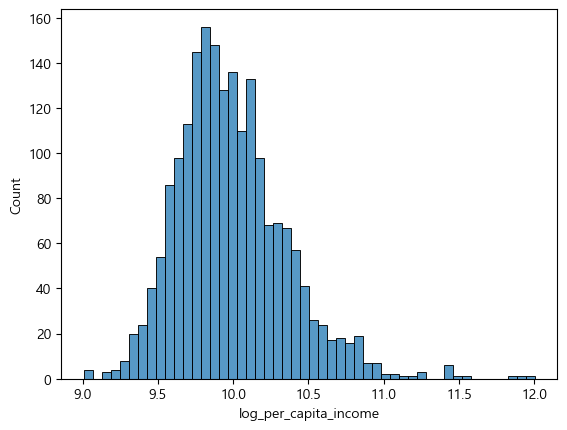

In [84]:
sns.histplot(user['log_per_capita_income'], bins=50)
plt.show()

In [85]:
user.drop(index=list(user[user['log_per_capita_income']<=q1- 1.5*iqr].index), inplace=True)

9284
16296


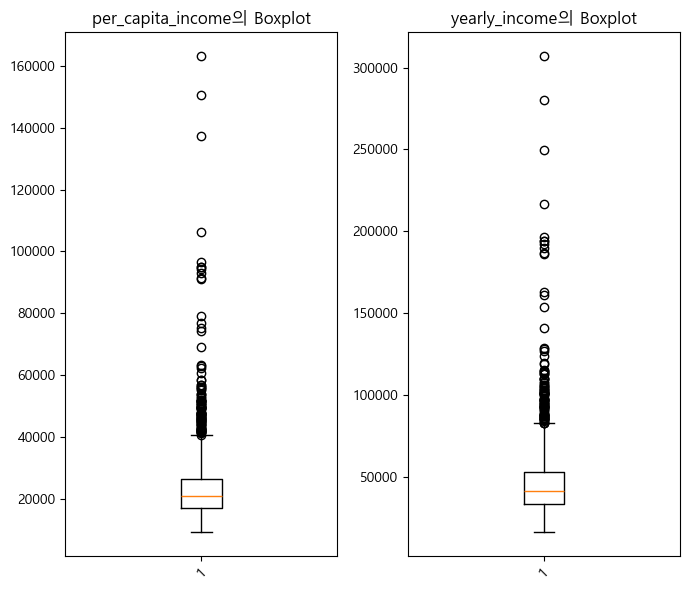

In [87]:
print(min(user['per_capita_income']))
print(min(user['yearly_income']))

fig, ax = plt.subplots(1,2,figsize=(7,6))
ax = ax.flatten()

for i,c in enumerate(['per_capita_income', 'yearly_income']):
    ax[i].boxplot(user[c])
    ax[i].set_title(f'{c}의 Boxplot')
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [88]:
user.shape

(1960, 16)

In [89]:
user.to_csv('./data/new_users_data.csv',index=False)

## Trans

In [ ]:
print(trans.shape)
trans.head()

(13305915, 12)


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [102]:
trans['date'] = pd.to_datetime(trans['date'])
trans['year'] = trans['date'].dt.year
trans['month'] = trans['date'].dt.month
trans['weekday'] = trans['date'].dt.weekday
trans.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,year,month,weekday
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,No,2010,1,4
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,No,2010,1,4
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,No,2010,1,4
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,No,2010,1,4
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,No,2010,1,4


### 결측치

In [91]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [92]:
trans.isna().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [93]:
trans['errors'] = trans['errors'].fillna('No')

In [94]:
def error_category(x):
    if 'Insufficient Balance' in x:
        return 'Insufficient Balance'
    elif x == 'No':
        return x
    else:
        return "Other"
    
trans['errors'] = trans['errors'].apply(error_category)

In [95]:
category_trans = trans.select_dtypes(['object'])
for c in category_trans.columns:
    print(f'{c}: {trans[c].unique()}')

date: ['2010-01-01 00:01:00' '2010-01-01 00:02:00' '2010-01-01 00:05:00' ...
 '2019-10-31 23:57:00' '2019-10-31 23:58:00' '2019-10-31 23:59:00']
amount: ['$-77.00' '$14.57' '$80.00' ... '$397.54' '$693.96' '$694.30']
use_chip: ['Swipe Transaction' 'Online Transaction' 'Chip Transaction']
merchant_city: ['Beulah' 'Bettendorf' 'Vista' ... 'Chester Heights' 'Shawboro'
 'King Ferry']
merchant_state: ['ND' 'IA' 'CA' 'IN' 'MD' 'NY' nan 'TX' 'HI' 'PA' 'WI' 'GA' 'AL' 'CT' 'WA'
 'MA' 'CO' 'NJ' 'OK' 'MT' 'FL' 'AZ' 'KY' 'LA' 'IL' 'OH' 'MO' 'MI' 'KS'
 'NC' 'AR' 'TN' 'NM' 'SC' 'MN' 'NV' 'OR' 'VA' 'SD' 'WV' 'ME' 'MS' 'RI'
 'NH' 'DE' 'VT' 'Mexico' 'ID' 'NE' 'DC' 'UT' 'Vatican City' 'WY'
 'Dominican Republic' 'Canada' 'AK' 'Costa Rica' 'Germany' 'China'
 'United Kingdom' 'Estonia' 'Tuvalu' 'Taiwan' 'United Arab Emirates'
 'Lithuania' 'Netherlands' 'Japan' 'Greece' 'Vietnam' 'Haiti' 'Ireland'
 'Singapore' 'France' 'South Africa' 'Thailand' 'Italy' 'Denmark'
 'Jamaica' 'Benin' 'Belgium' 'Sierra Leone' '

### 문자형 -> 수치형

In [96]:
# 문자열 제거
trans['amount'] = pd.to_numeric(trans['amount'].str.replace('$',''), errors='coerce')
trans.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,No
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,No
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,No
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,No
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,No


### 이상치
1. amount가 -면 환불한 기록

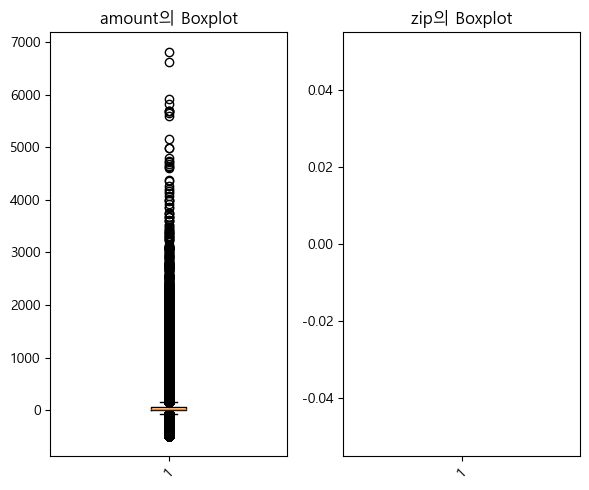

In [98]:
numeric_trans_col = ['amount', 'zip']

fig, ax = plt.subplots(1,2,figsize=(6,5))
ax = ax.flatten()

for i,c in enumerate(numeric_trans_col):
    ax[i].boxplot(trans[c])
    ax[i].set_title(f'{c}의 Boxplot')
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [99]:
trans.to_csv('./data/new_transactions_data.csv',index=False)

---

In [100]:
print(card.shape)
print(trans.shape)
print(user.shape)

(5529, 14)
(13305915, 12)
(1960, 16)


In [103]:
card_copy = card[['id','client_id','card_type','num_cards_issued','credit_limit','card_brand']].copy()
trans_copy = trans[['id', 'client_id', 'card_id', 'amount', 'errors','year','month','weekday']].copy()
user_copy = user[['id', 'current_age', 'retirement_age', 'gender',
                    'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards']].copy()

card_copy.to_csv('./data/final_card_data.csv',index=False)
trans_copy.to_csv('./data/final_transactions_data.csv',index=False)
user_copy.to_csv('./data/final_user_data.csv',index=False)

## 파생변수
1. user
    - 은퇴나이 - 나이
2. trans
    - amount < 0 -> 환불 T/F
    - 고객 id 기준(카드id도 포함..?) 잔액부족횟수/전체 거래횟수
    - 부채 / 월소득
    - 월 평균 금액 (date 추가)
    - 연 평균 금액
    - 주요 소비 요일
    - 소비 추세 ()
    - 전체 카드 이용료 / 월소득
3. card
    - 사용한 카드 브랜드 수...?(card_brand도 추가)

### 1. User

In [104]:
user_copy['years_to_retirement'] = user_copy['retirement_age']-user_copy['current_age']
user_copy.head()

,id,current_age,retirement_age,gender,yearly_income,total_debt,credit_score,num_credit_cards,years_to_retirement
0,825,53,66,Female,59696,127613,787,5,13
1,1746,53,68,Female,77254,191349,701,5,15
2,1718,81,67,Female,33483,196,698,5,-14
3,708,63,63,Female,249925,202328,722,4,0
4,1164,43,70,Male,109687,183855,675,1,27


### 2. Trans

### 3. Card

In [109]:
brand_group = card_copy.groupby(['client_id'])['card_brand'].nunique()

user_copy['use_card_brand'] = user_copy["id"].map(brand_group)
user_copy.head()


,id,current_age,retirement_age,gender,yearly_income,total_debt,credit_score,num_credit_cards,years_to_retirement,use_card_brand
0,825,53,66,Female,59696,127613,787,5,13,1.0
1,1746,53,68,Female,77254,191349,701,5,15,2.0
2,1718,81,67,Female,33483,196,698,5,-14,2.0
3,708,63,63,Female,249925,202328,722,4,0,2.0
4,1164,43,70,Male,109687,183855,675,1,27,1.0
